In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df=pd.read_csv("./mushroom_cleaned.csv")

In [88]:
df.head(21)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1
6,1300,2,2,10,3.835320,1563,11,1.804273,1
7,1354,6,2,10,3.676160,1532,11,0.888450,1
8,1222,6,2,10,3.771656,1476,11,0.943195,1
9,1085,6,2,10,3.775635,1581,11,0.888450,1


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


![alt text](mushroom.jpg)

- cap-diameter: Đường kính mũ nấm
- cap-shape: Hình dạng mũ nấm
- gill-attachment: Vị trí bám của mang nấm
- gill-color: Màu sắc của mang nấm
- stem-height: Chiều cao của thân nấm
- stem-width: Chiều rộng của thân nấm
- stem-color: Màu sắc của thân nấm
- season: Mùa nấm mọc
- class: Loại nấm ( Ăn được hoặc có độc)

# Phân tích dữ liệu

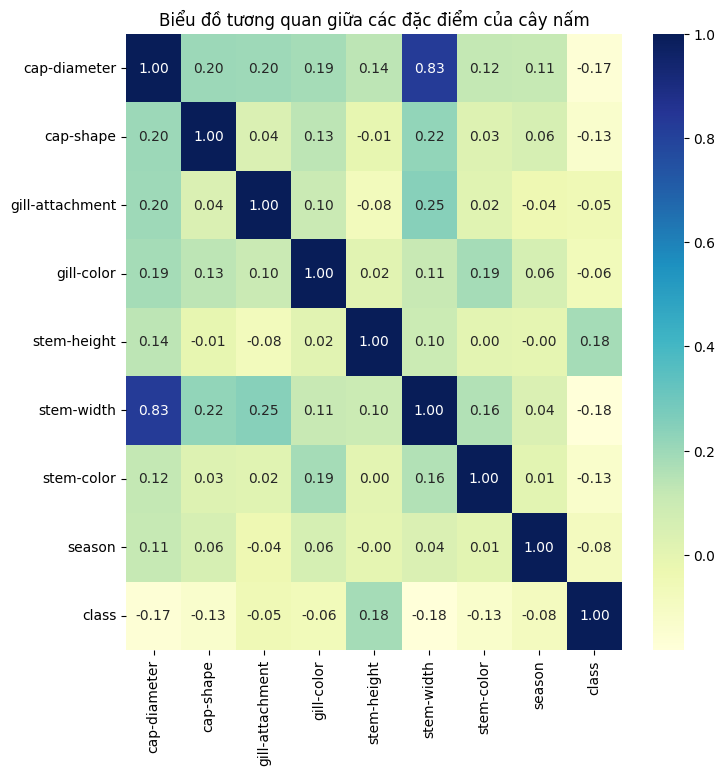

In [90]:
plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.title("Biểu đồ tương quan giữa các đặc điểm của cây nấm")
plt.show()

# Tổng số và tỉ lệ nấm Ăn được và Có độc

In [91]:
totalEdiblePoisonous = df['class'].value_counts()

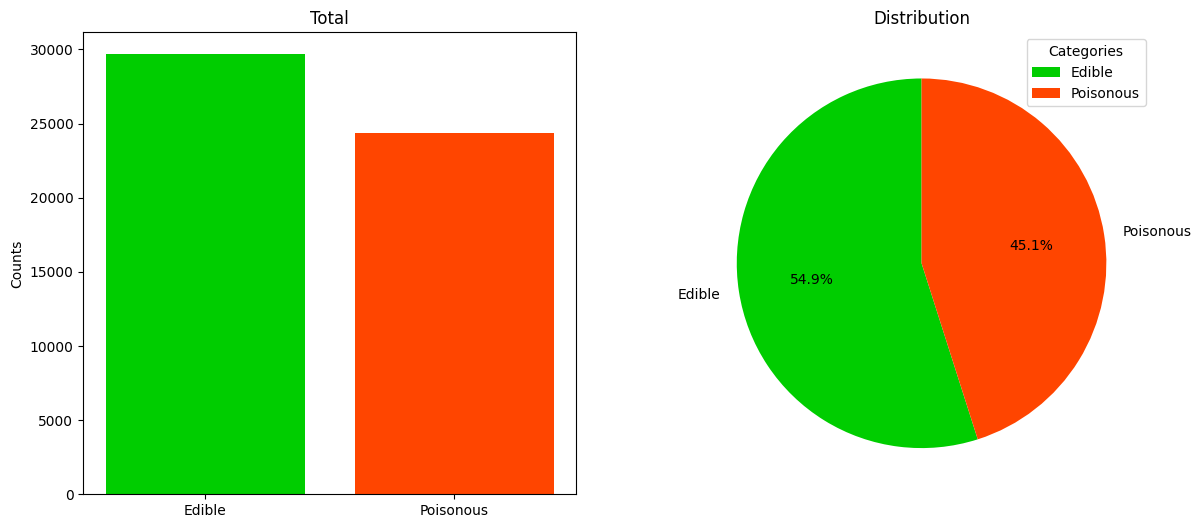

In [92]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((1,2), (0,0))
ax1.bar(['Edible', 'Poisonous'], totalEdiblePoisonous.values, color=['#00CD00', '#FF4500'])
ax1.set_ylabel('Counts')
ax1.ticklabel_format(style='plain', axis='y')
ax1.set_title('Total')

ax2 = plt.subplot2grid((1,2), (0,1))
ax2.pie(totalEdiblePoisonous.values, labels=['Edible', 'Poisonous'], autopct='%1.1f%%', startangle=90, colors=['#00CD00', '#FF4500'])
ax2.set_title('Distribution')
ax2.legend(title="Categories", bbox_to_anchor=(1, 1))

plt.show()

# Tương quan giữa nấm Ăn được và Có độc với từng cột

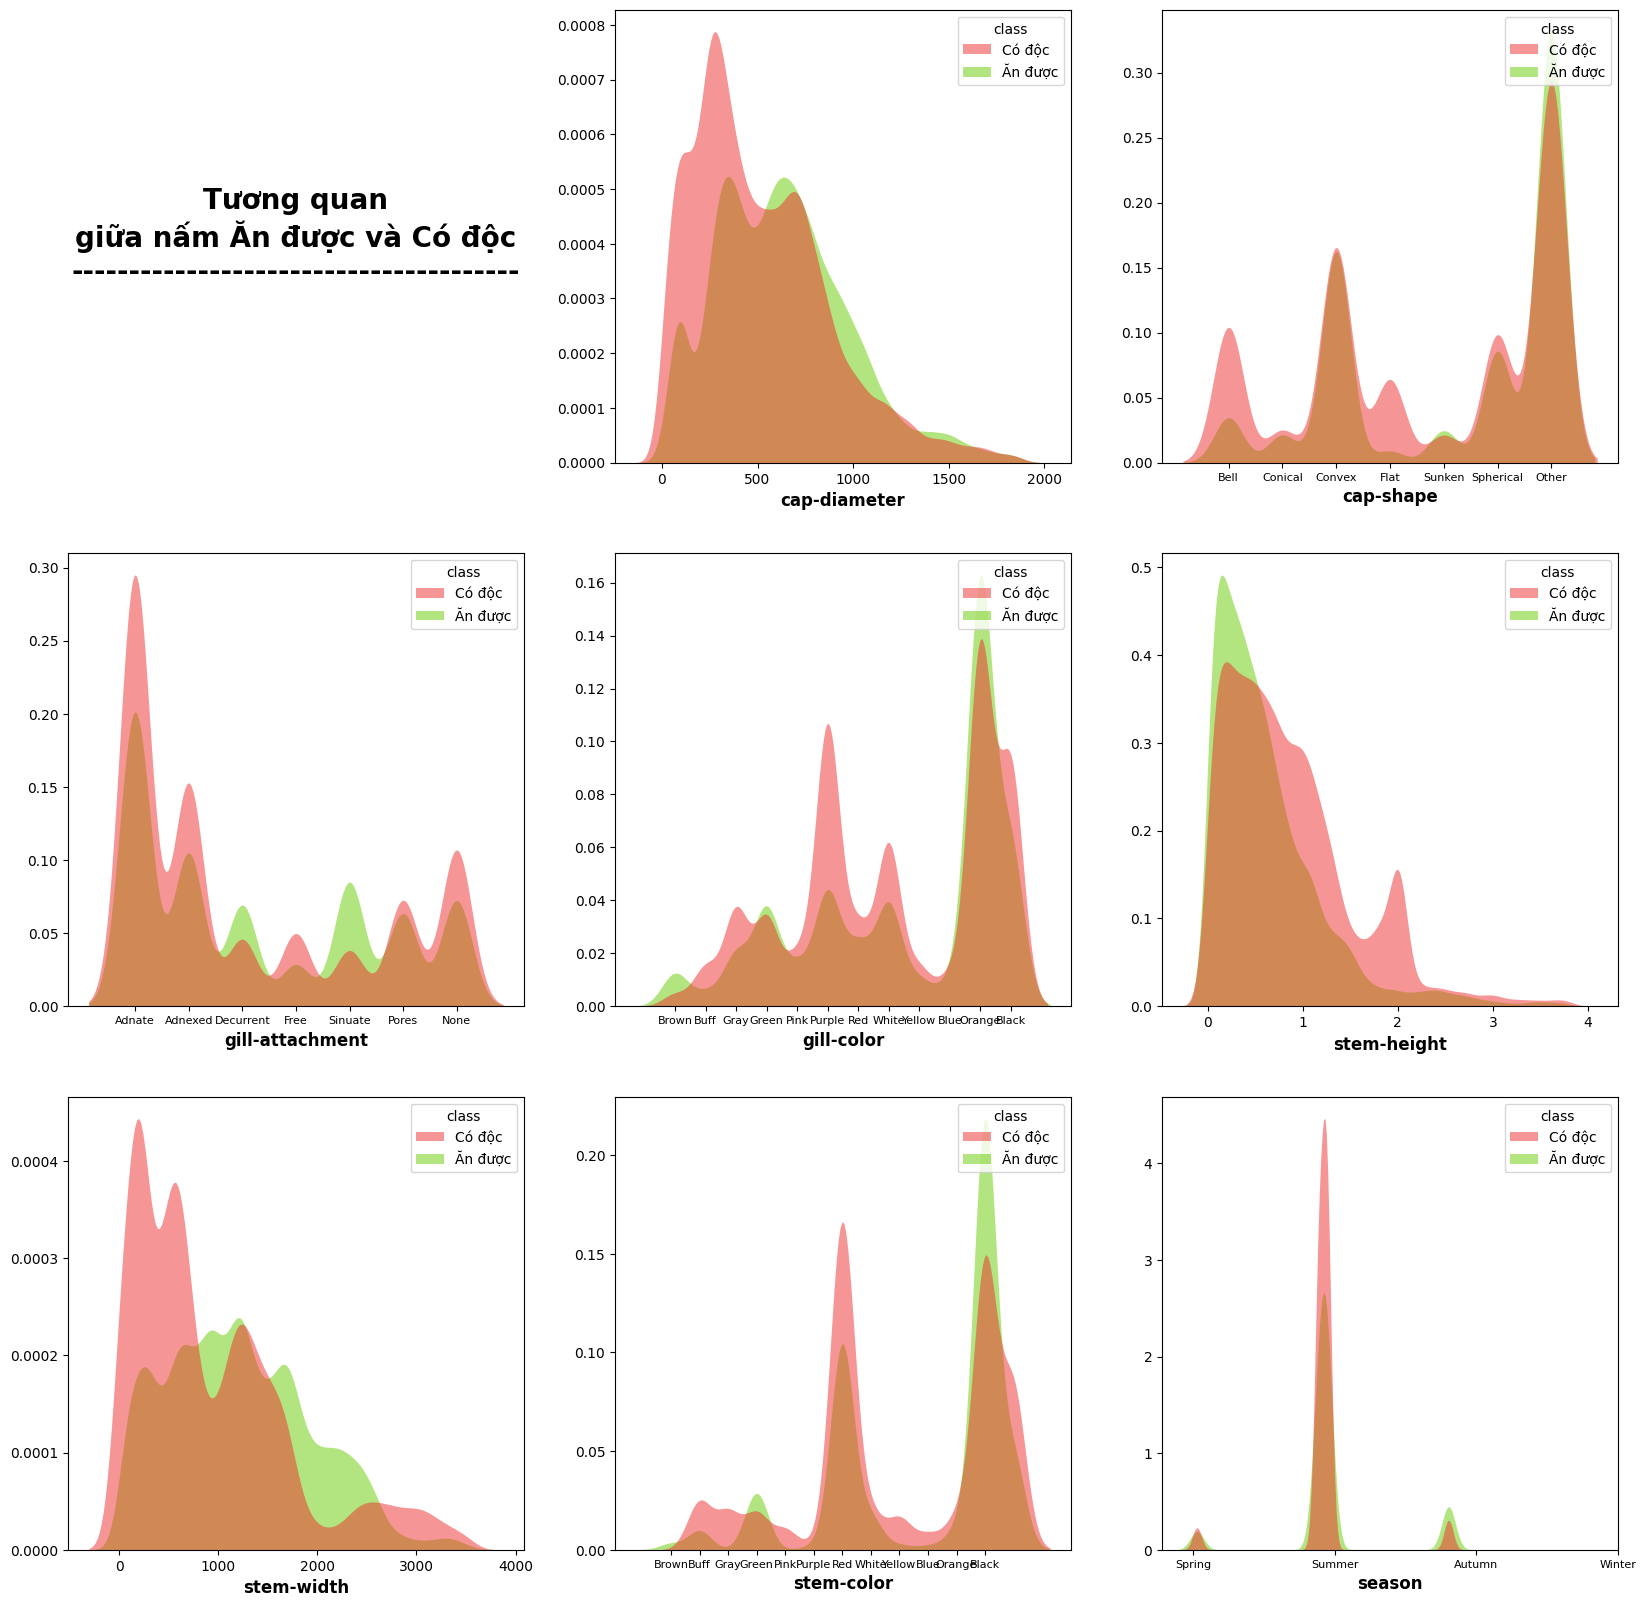

In [93]:
# Tảo bảng mới với chỉ số và tên tương ứng
column_mappings = {
    'cap-shape': {0:'Bell', 1:'Conical', 2:'Convex', 3:'Flat', 4:'Sunken', 5:'Spherical', 6:'Other'},
    'gill-attachment': {0:'Adnate', 1:'Adnexed', 2:'Decurrent', 3:'Free', 4:'Sinuate', 5:'Pores', 6:'None'},
    'gill-color': {0:'Brown', 1:'Buff', 2:'Gray', 3:'Green', 4:'Pink', 5:'Purple', 6:'Red', 7:'White', 8:'Yellow', 9:'Blue', 10:'Orange', 11:'Black'},
    'stem-color': {0:'Brown', 1:'Buff', 2:'Gray', 3:'Green', 4:'Pink', 5:'Purple', 6:'Red', 7:'White', 8:'Yellow', 9:'Blue', 10:'Orange', 11:'Black'},
    'season': {0:'Spring', 1:'Summer', 2:'Autumn', 3:'Winter'}
}

# Tạo lưới
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes[0, 0].axis('off') # Không vẽ trục lên ô (0, 0)

# Đặt lại tên
df['class'] = df['class'].replace({0:'Ăn được',1:'Có độc'})

# Chỉ định palette màu
palette = sns.color_palette(['#EE2C2C', '#66CD00'])

# Vẽ vào các ô trong mạng lưới
for col, ax in zip(df.columns[:-1], axes.flat[1:]):
    sns.kdeplot(data=df, x=col, ax=ax, hue=df['class'], palette=palette, alpha=.5, linewidth=0, fill=True)
    ax.set_xlabel(col, fontsize=12, fontweight='bold')
    ax.set_ylabel('')
    if col in column_mappings.keys():
        ax.set_xticks(list(column_mappings[col].keys()))
        ax.set_xticklabels(column_mappings[col].values(), fontsize=8)

# Hiển thị văn bản trong ô (0, 0)
axes[0, 0].text(0.5, 0.5, 'Tương quan\ngiữa nấm Ăn được và Có độc\n---------------------------------------', ha='center', va='center', fontsize=20, fontweight='bold')

df['class'] = df['class'].replace({'Edible':0,'Poisonous':1})

plt.show()


## Outlier của dữ liệu 

Text(0.5, 0, 'stem-width')

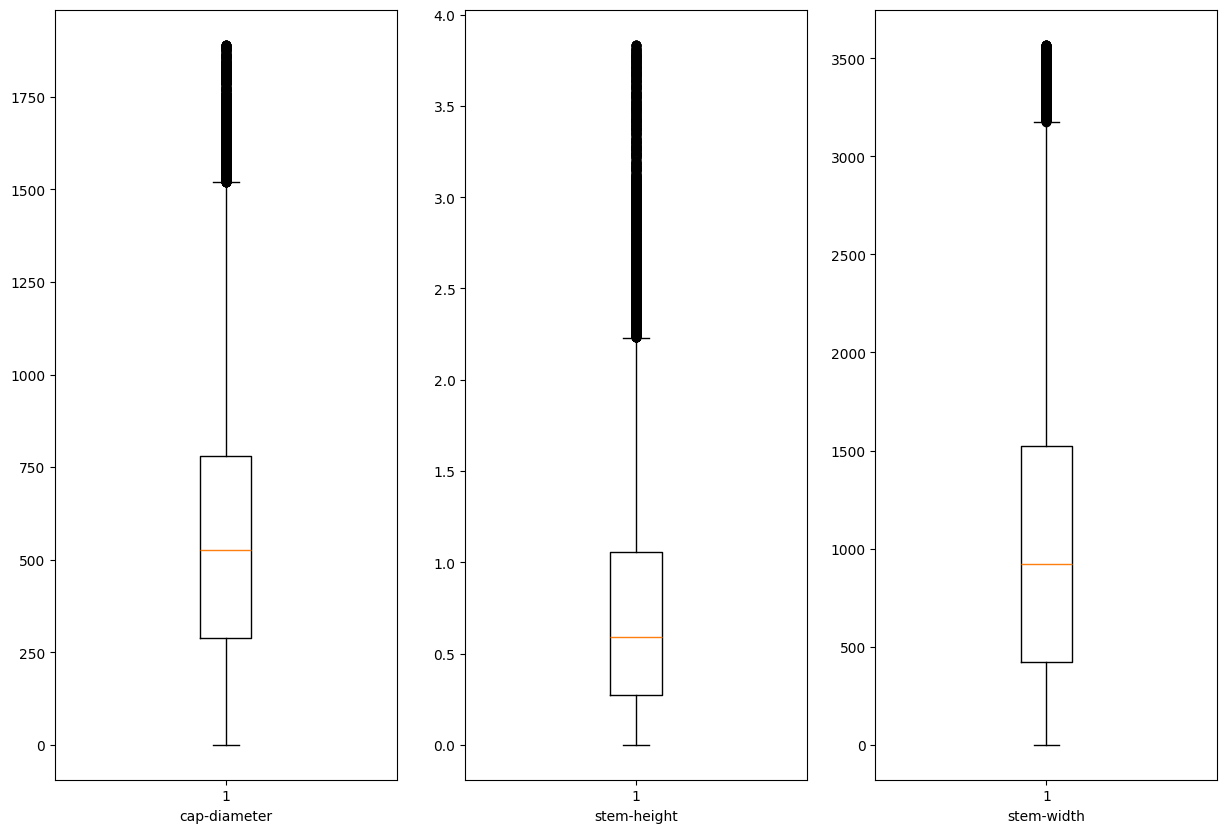

In [94]:
fig, axes = plt.subplots(1,3 , figsize=(15, 10))
axes[0].boxplot(data=df, x = "cap-diameter")
axes[0].set_xlabel("cap-diameter")
axes[1].boxplot(data=df, x = "stem-height")
axes[1].set_xlabel("stem-height")
axes[2].boxplot(data=df, x = "stem-width")
axes[2].set_xlabel("stem-width")

# Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [96]:
LR = LogisticRegression(max_iter=200)

In [97]:
# Baseline
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify = y)
X_val, X_train, y_val, y_train = train_test_split(X_train, y_train, test_size=0.1, random_state=0, stratify=y_train)
LR.fit(X_train, y_train).score(X_val, y_val)

d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6393629903808806

In [98]:
# Xử lý outlier

from scipy import stats

# Hàm để loại bỏ outlier bằng Z-score
def remove_outliers_zscore(df, column, threshold=2):
    z_scores = np.abs(stats.zscore(df[column]))
    return df[(z_scores < threshold)]

# Loại bỏ outlier trong các cột 'stem-width', 'stem-height'
df = remove_outliers_zscore(df, 'cap-diameter')
df = remove_outliers_zscore(df, 'stem-width')
df = remove_outliers_zscore(df, 'stem-height')

print(df.shape)  # Kích thước dữ liệu sau khi loại bỏ outlier


(46211, 9)


In [99]:
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify = y)
X_val, X_train, y_val, y_train = train_test_split(X_train, y_train, test_size=0.1, random_state=0, stratify=y_train)
LR.fit(X_train, y_train).score(X_val, y_val)

d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6309377504675394

In [100]:
# Chuẩn hóa
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X) # Tính trung bình và độ lệch chuẩn của từng đặc trưng
X_scaler = scaler.transform(X) # Trừ tb và chia cho độ lệch chuẩn

In [101]:
# Dùng Regularization và cross validation
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'sag']
}
LR_regu = GridSearchCV(LR, param_grid, scoring='accuracy')
LR_regu.fit(X_train, y_train).score(X_val, y_val)

d:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\Anacond

0.6427998931338499

In [102]:
LR_regu.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [103]:
# Dự đoán
y_pre = LR_regu.predict(X_test)

In [104]:
evaluate = classification_report(y_test, y_pre, output_dict=True)
evaluate_df = pd.DataFrame(evaluate).transpose()
evaluate_df

,precision,recall,f1-score,support
Có độc,0.663374,0.707169,0.684572,2469.000000
Ăn được,0.636683,0.588481,0.611634,2153.000000
accuracy,0.651882,0.651882,0.651882,0.651882
macro avg,0.650029,0.647825,0.648103,4622.000000
weighted avg,0.650941,0.651882,0.650596,4622.000000


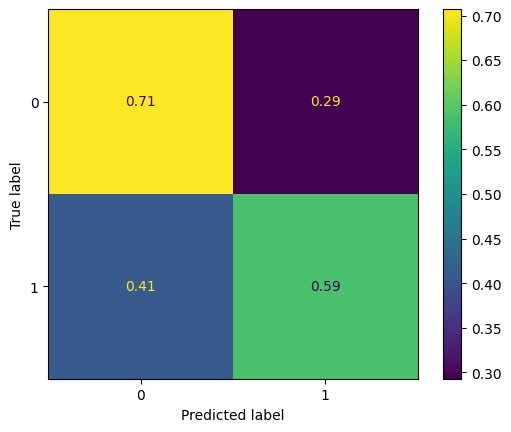

In [105]:
cf = confusion_matrix(y_test, y_pre, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cf)
disp.plot()